# SuperKart Project

## Context:

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of actions. Forecasting helps an organization to plan its sales operations by regions and provide valuable insights to the supply chain team regarding the procurement of goods and materials.
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective:

SuperKartKart is an organization which owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.


## Data Description:

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number
* Product_Weight - weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular and no sugar
* Product_Allocated_Area - ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, breads, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - year in which the store was established
* Store_Size - size of the store depending on sq. feet like high, medium and low
* Store_Location_City_Type - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

## Importing necessary libraries and data

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import RobustScaler
from scipy.stats import boxcox
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# Linear regression model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Overview

- Observations
- Sanity checks

In [3]:
# read the data
df = pd.read_csv(r"C:\Users\aniruman\Documents\BA Academy 2023\Capstone\Python\SuperKart.csv")
# returns the first 5 rows
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [4]:
# counting row and column
print('The data frame has',df.shape[0],'rows and',df.shape[1],'columns')

The data frame has 8763 rows and 12 columns


#### Observations:
The DataFrame has 12 columns and 8763 row for values.

In [5]:
unique_counts = df['Product_Sugar_Content'].value_counts()
print(unique_counts)

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64


#### Observations:
The data description says there are only 3 unique values, "low sugar, regular and no sugar" but there are 4 unique values shown here. Hence, we have to replace reg with regular for data sanitation.

In [6]:
# Replace the reg value to Regular
df['Product_Sugar_Content'] = df['Product_Sugar_Content'].replace(['reg'],"Regular")

# ..Then Change the data types accordingly
df = df.astype({"Product_Sugar_Content": object})

#...Then confirm the data type has changed accordingly
unique_counts = df['Product_Sugar_Content'].value_counts()
print(unique_counts)

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
- Different varieties of products are available at stores. A store needs to plan its inventory appropriately which is well aligned to the supply and demand characteristics. Which product type is contributing the most to the revenue of the company (SuperKart)?
- Location may have a high impact on the revenue of a store. Find out the type of stores and locations that are having a high impact on the revenue of the company.
- Nowadays many customers prefer products that have low sugar content in them. How many items have been sold in each of the 16 product types that have low sugar content in them?
- Which product type has been sold the most number of times in each of the stores? Which product type is contributing the most to the revenue of the individual stores?
- There are some stores of a company that generally sell only premium items having higher prices than others. Which store has sold more costly goods than others?


## Detailed Exploratory Data Analysis (EDA)

In [7]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### Histogram and Boxplot of product weight

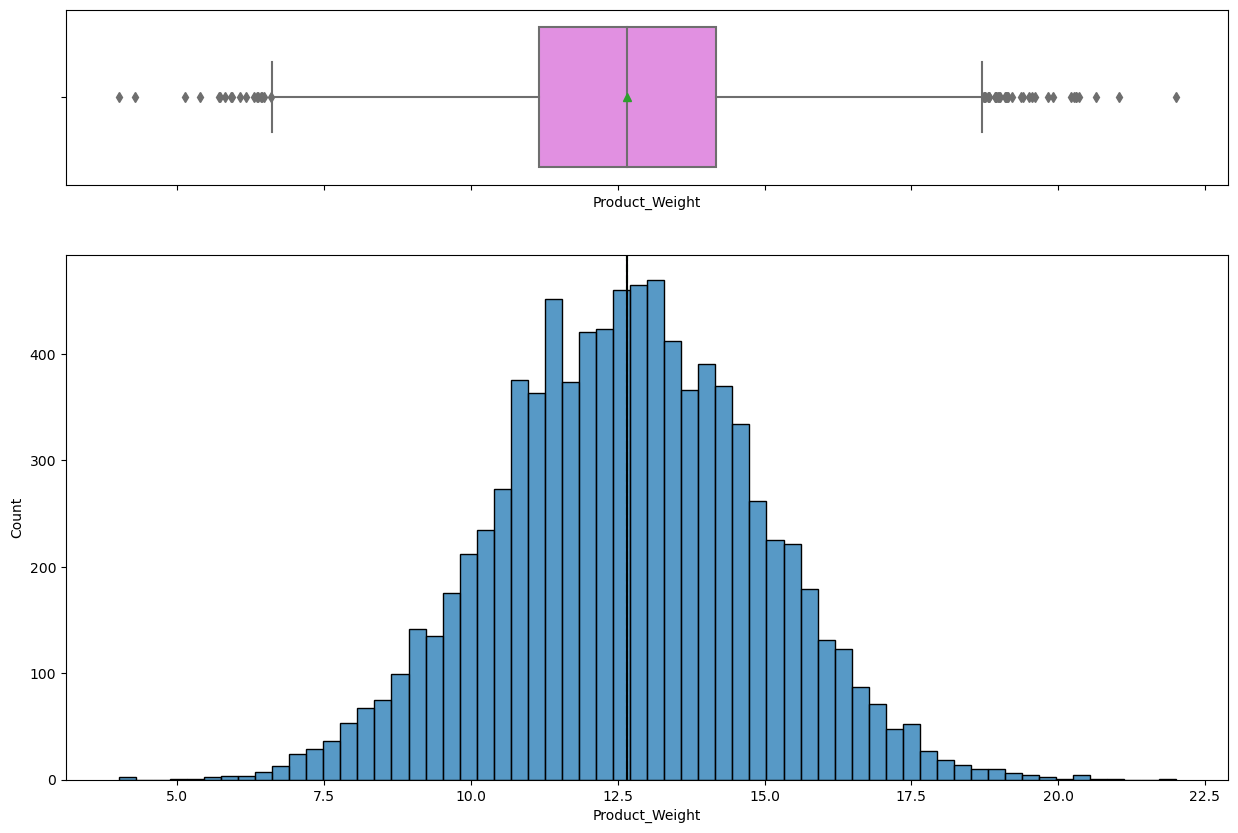

In [9]:
histogram_boxplot(df, "Product_Weight")

* The product weight are close to normal distribution with fatter tails
* The median of product weight is 12.5

##### Histogram and Boxplot of product allocated area

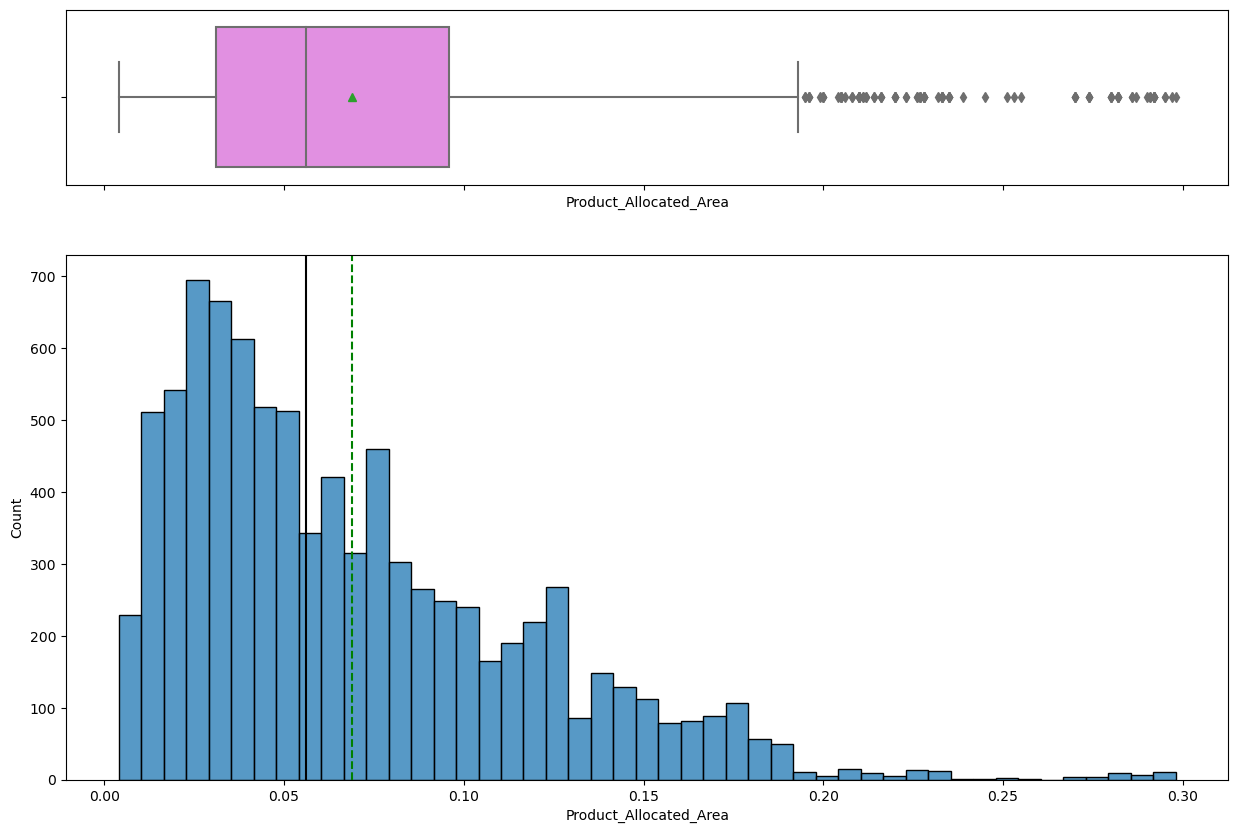

In [10]:
histogram_boxplot(df, "Product_Allocated_Area")

* The distribution for product allocated area is right skewed with median product allocated area of ~0.06.
* The outlier generally starts at 0.20. 

##### Histogram and Boxplot of product MRP

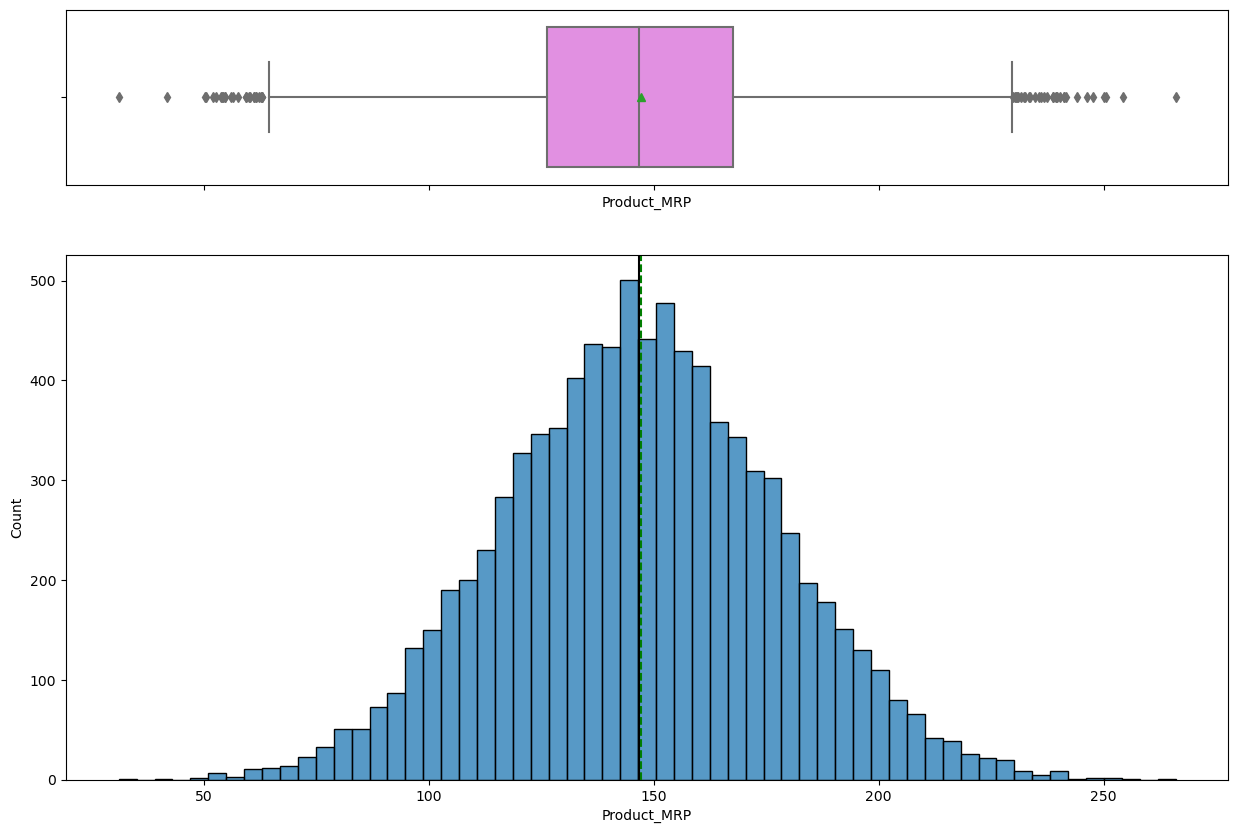

In [11]:
histogram_boxplot(df, "Product_MRP")

* The MRP follows a normal distribution with a median of 150
* It has outliers on both lower end and higher end.

##### Histogram and Boxplot of Product_Store_Sales_Total

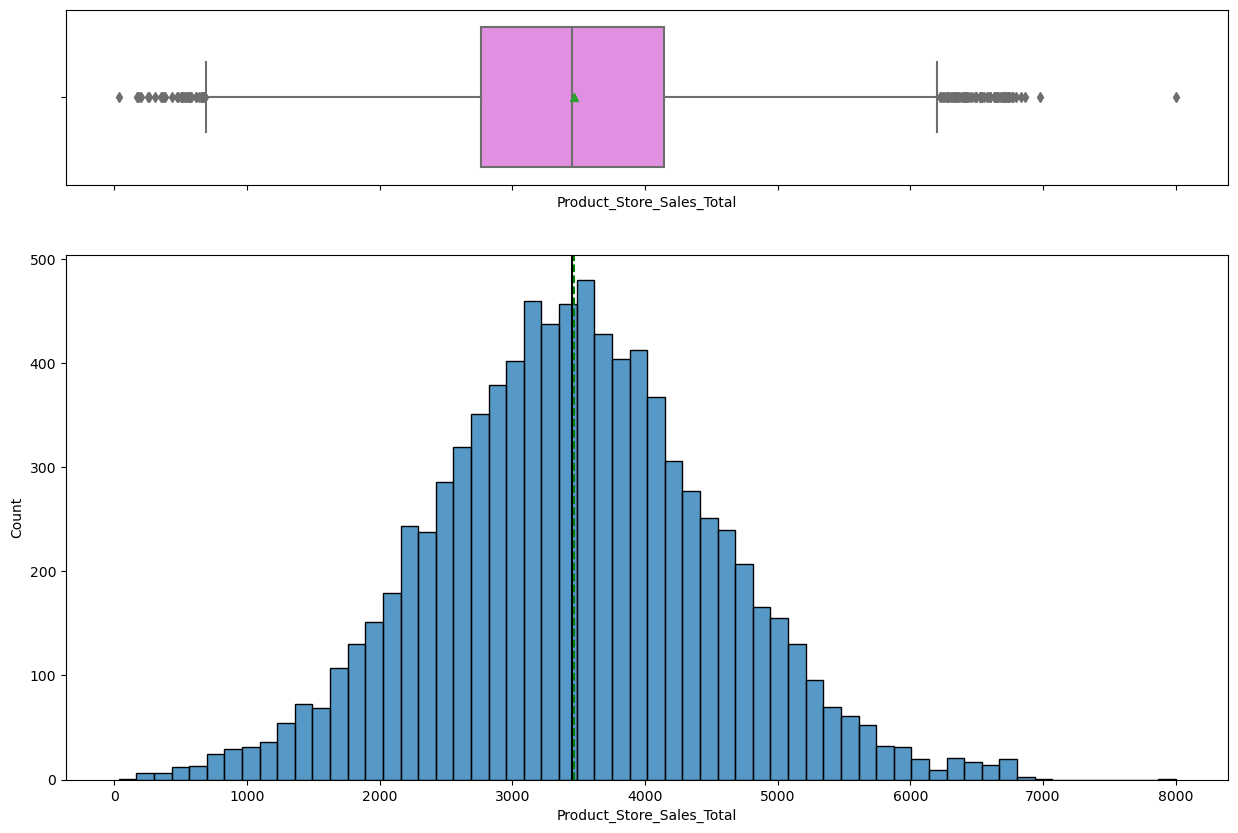

In [12]:
histogram_boxplot(df, "Product_Store_Sales_Total")

* The distribution for total sales is normally distributed with a slight tail to the left. 
* Like MRP this also as outliers on both the end.

#### Barplot for product type

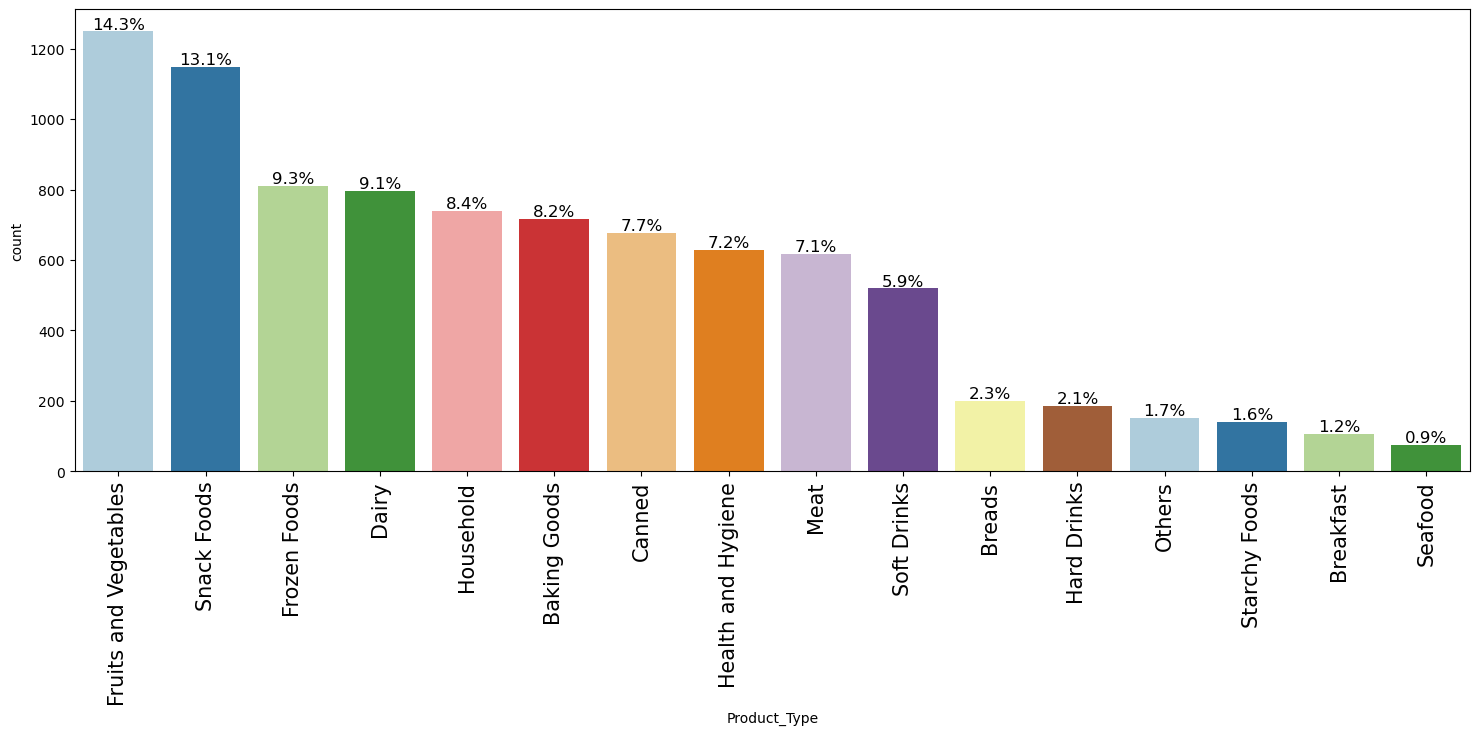

In [13]:
labeled_barplot(df, "Product_Type", perc=True)

* Most of the product are 'Fruits and Vegetables' with 14.3% followed by 'Snack Foods' with 13.1%, 'Frozen Foods' with 9.3%, 'Dairy' with 9.1% and so on with other product types. The least type is 'Seafood' with only 0.9%

#### Correlation Analysis

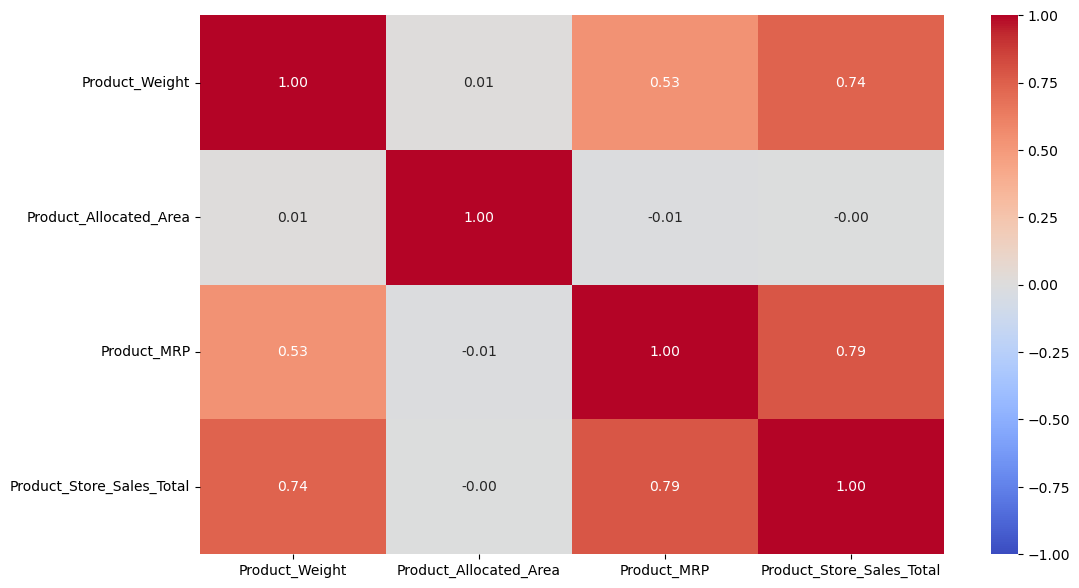

In [14]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("Store_Establishment_Year")

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

* From the above heatmap, we can say that 'Product_Weight', 'Product_MRP', is highly corelated to 'Product_Store_Sales_Total'.
* Also 'Product_Weight' is slightly correlated to 'Product_MRP'.

### Different varieties of products are available at stores. A store needs to plan its inventory appropriately which is well aligned to the supply and demand characteristics. Which product type is contributing the most to the revenue of the company (SuperKart)?

The product type contributing the most to the revenue is: Fruits and Vegetables
Sales amount for the top product type: 4300833.27


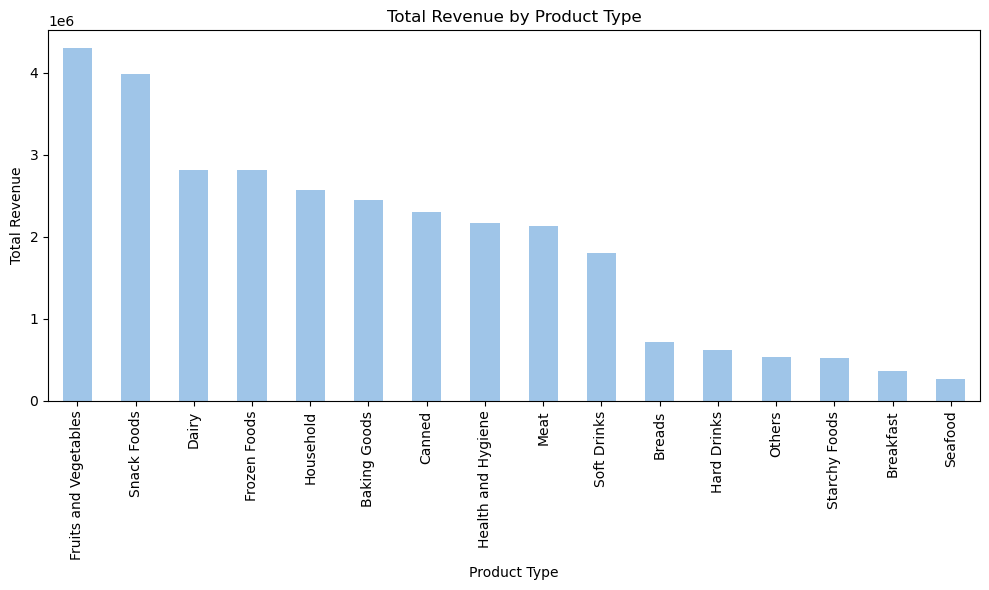

In [15]:
import pandas as pd

# Group by 'Product_Type' and sum the 'Product_Store_Sales_Total' for each product type
revenue_by_product_type = df.groupby('Product_Type')['Product_Store_Sales_Total'].sum()

# Sort the result in descending order to find the product type with the highest revenue
sorted_revenue = revenue_by_product_type.sort_values(ascending=False)

# Find the product type with the highest revenue
top_product_type = revenue_by_product_type.idxmax()
top_product_sales_amount = revenue_by_product_type.max()

print(f"The product type contributing the most to the revenue is: {top_product_type}")
print(f"Sales amount for the top product type: {top_product_sales_amount:.2f}")


# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_revenue.plot(kind='bar', color=['#9fc5e8'])
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Top Revenue Contributor:
The product type contributing the most to the revenue is: Fruits and Vegetables with sales amount of $4300833.27

### Location may have a high impact on the revenue of a store. Find out the type of stores and locations that are having a high impact on the revenue of the company.

The type of store with the greatest revenue is Supermarket Type2
Overall sales for the best store type is 15427583.43
The location which generates the highest amount of revenue is Tier 2
Revenue for the top location type is 21650696.61


<Figure size 1200x600 with 0 Axes>

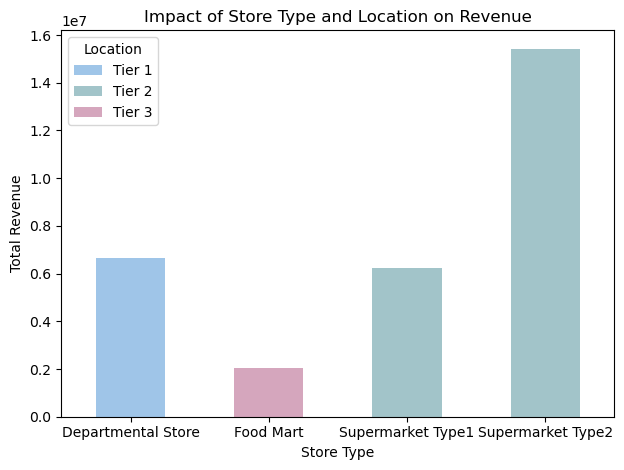

In [16]:
# Group by 'Store_Type' and calculate the average revenue for each store type
store_type_revenue = df.groupby('Store_Type')['Product_Store_Sales_Total'].sum()

# Group by 'Store_Location_City_Type' and calculate the average revenue for each location
location_revenue = df.groupby('Store_Location_City_Type')['Product_Store_Sales_Total'].sum()

# Find the store type and location with the highest average revenue
top_store_type = store_type_revenue.idxmax()
top_store_type_revenue = store_type_revenue.max()

top_location = location_revenue.idxmax()
top_location_revenue = location_revenue.max()

print(f"The type of store with the greatest revenue is {top_store_type}")
print(f"Overall sales for the best store type is {top_store_type_revenue:.2f}")

print(f"The location which generates the highest amount of revenue is {top_location}")
print(f"Revenue for the top location type is {top_location_revenue:.2f}")

# Creating a pivot
store_location_revenue = df.pivot_table(index='Store_Type', columns='Store_Location_City_Type', values='Product_Store_Sales_Total', aggfunc='sum')

# Create a bar plot
plt.figure(figsize=(12, 6))
store_location_revenue.plot(kind='bar', stacked=True, color=['#9fc5e8', '#a2c4c9', '#d5a6bd'])
plt.xlabel('Store Type')
plt.ylabel('Total Revenue')
plt.title('Impact of Store Type and Location on Revenue')
plt.xticks(rotation=0)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

##### Type of stores and locations with high impact on the revenue:

Supermarket Type 2 is the store type with the highest revenue. The top store type has an overall sales of USD 15427583.43. Tier 2 is the location where the most revenue is made. The revenue for top location type is USD 21650696.61

### Nowadays many customers prefer products that have low sugar content in them. How many items have been sold in each of the 16 product types that have low sugar content in them?

Product_Type
Fruits and Vegetables    864
Snack Foods              804
Dairy                    590
Frozen Foods             531
Baking Goods             462
Canned                   402
Meat                     377
Soft Drinks              370
Breads                   148
Hard Drinks              128
Starchy Foods             97
Breakfast                 65
Seafood                   47
Name: Product_Store_Sales_Total, dtype: int64


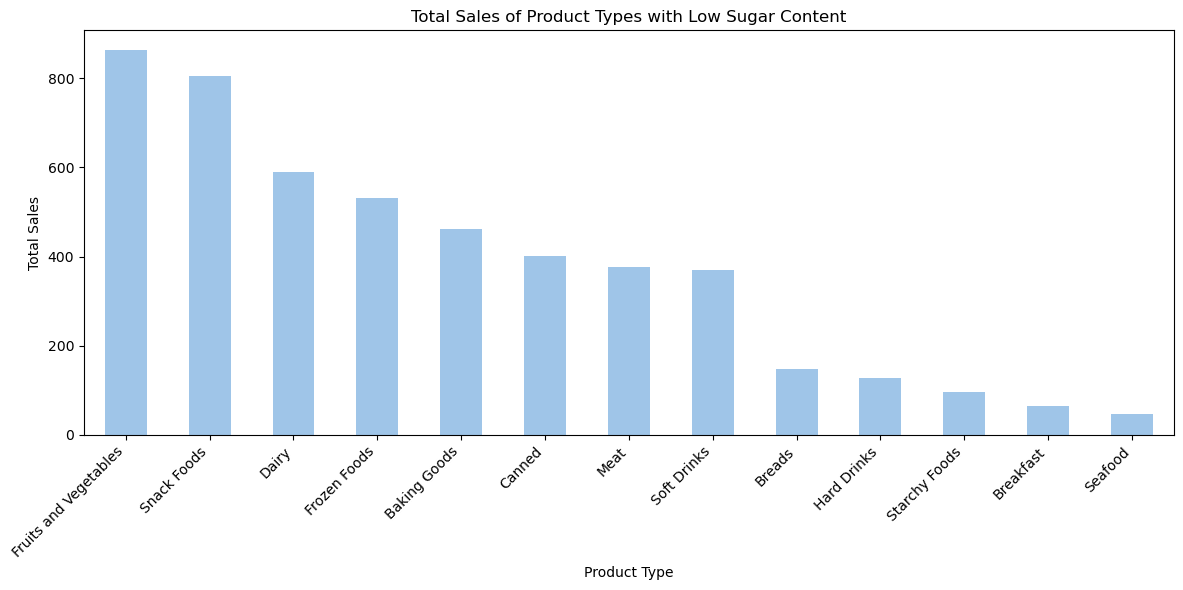

In [17]:
# Filter the DataFrame to rows with 'Product_Sugar_Content' set to 'Low'.
low_sugar_df = df[df['Product_Sugar_Content'] == 'Low Sugar']

# Count the quantity of each product type sold after grouping by 'Product_Type'
items_sold_by_product_type = low_sugar_df.groupby('Product_Type')['Product_Store_Sales_Total'].count().sort_values(ascending=False)

print(items_sold_by_product_type)

# Create a bar plot
plt.figure(figsize=(12, 6))
items_sold_by_product_type.plot(kind='bar', color=['#9fc5e8'])
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales of Product Types with Low Sugar Content')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Number of items sold in each of the 16 product types that have low sugar content
We can see that The category "Fruits and Vegetables" saw sales of 864 items. 804 items were sold under the "Snack Foods" category. 590 products under the "Dairy" category were sold. The "Frozen Foods" category had sales of 531 different items overall. 462 products in the "Baking Goods" category were sold. The "Canned" category saw the sale of 402 goods. There were 377 sales of "Meat" products. There were 370 goods sold under the "Soft Drinks" category. 148 products in the "Breads" category were sold. 128 items fell under the "Hard Drinks" category and were sold. There were 97 products marketed under the "Starchy Foods" category. There were 65 sales in the "Breakfast" category. Finally, 47 goods were sold under the "Seafood" category.

### Which product type has been sold the most number of times in each of the stores? Which product type is contributing the most to the revenue of the individual stores?

Product type sold the most number of times in each store:
Store_Id
OUT001              (OUT001, Snack Foods)
OUT002    (OUT002, Fruits and Vegetables)
OUT003              (OUT003, Snack Foods)
OUT004    (OUT004, Fruits and Vegetables)
Name: Product_Store_Sales_Total, dtype: object

Product type contributing the most to the revenue of each store:
Store_Id
OUT001              (OUT001, Snack Foods)
OUT002    (OUT002, Fruits and Vegetables)
OUT003              (OUT003, Snack Foods)
OUT004    (OUT004, Fruits and Vegetables)
Name: Product_Store_Sales_Total, dtype: object


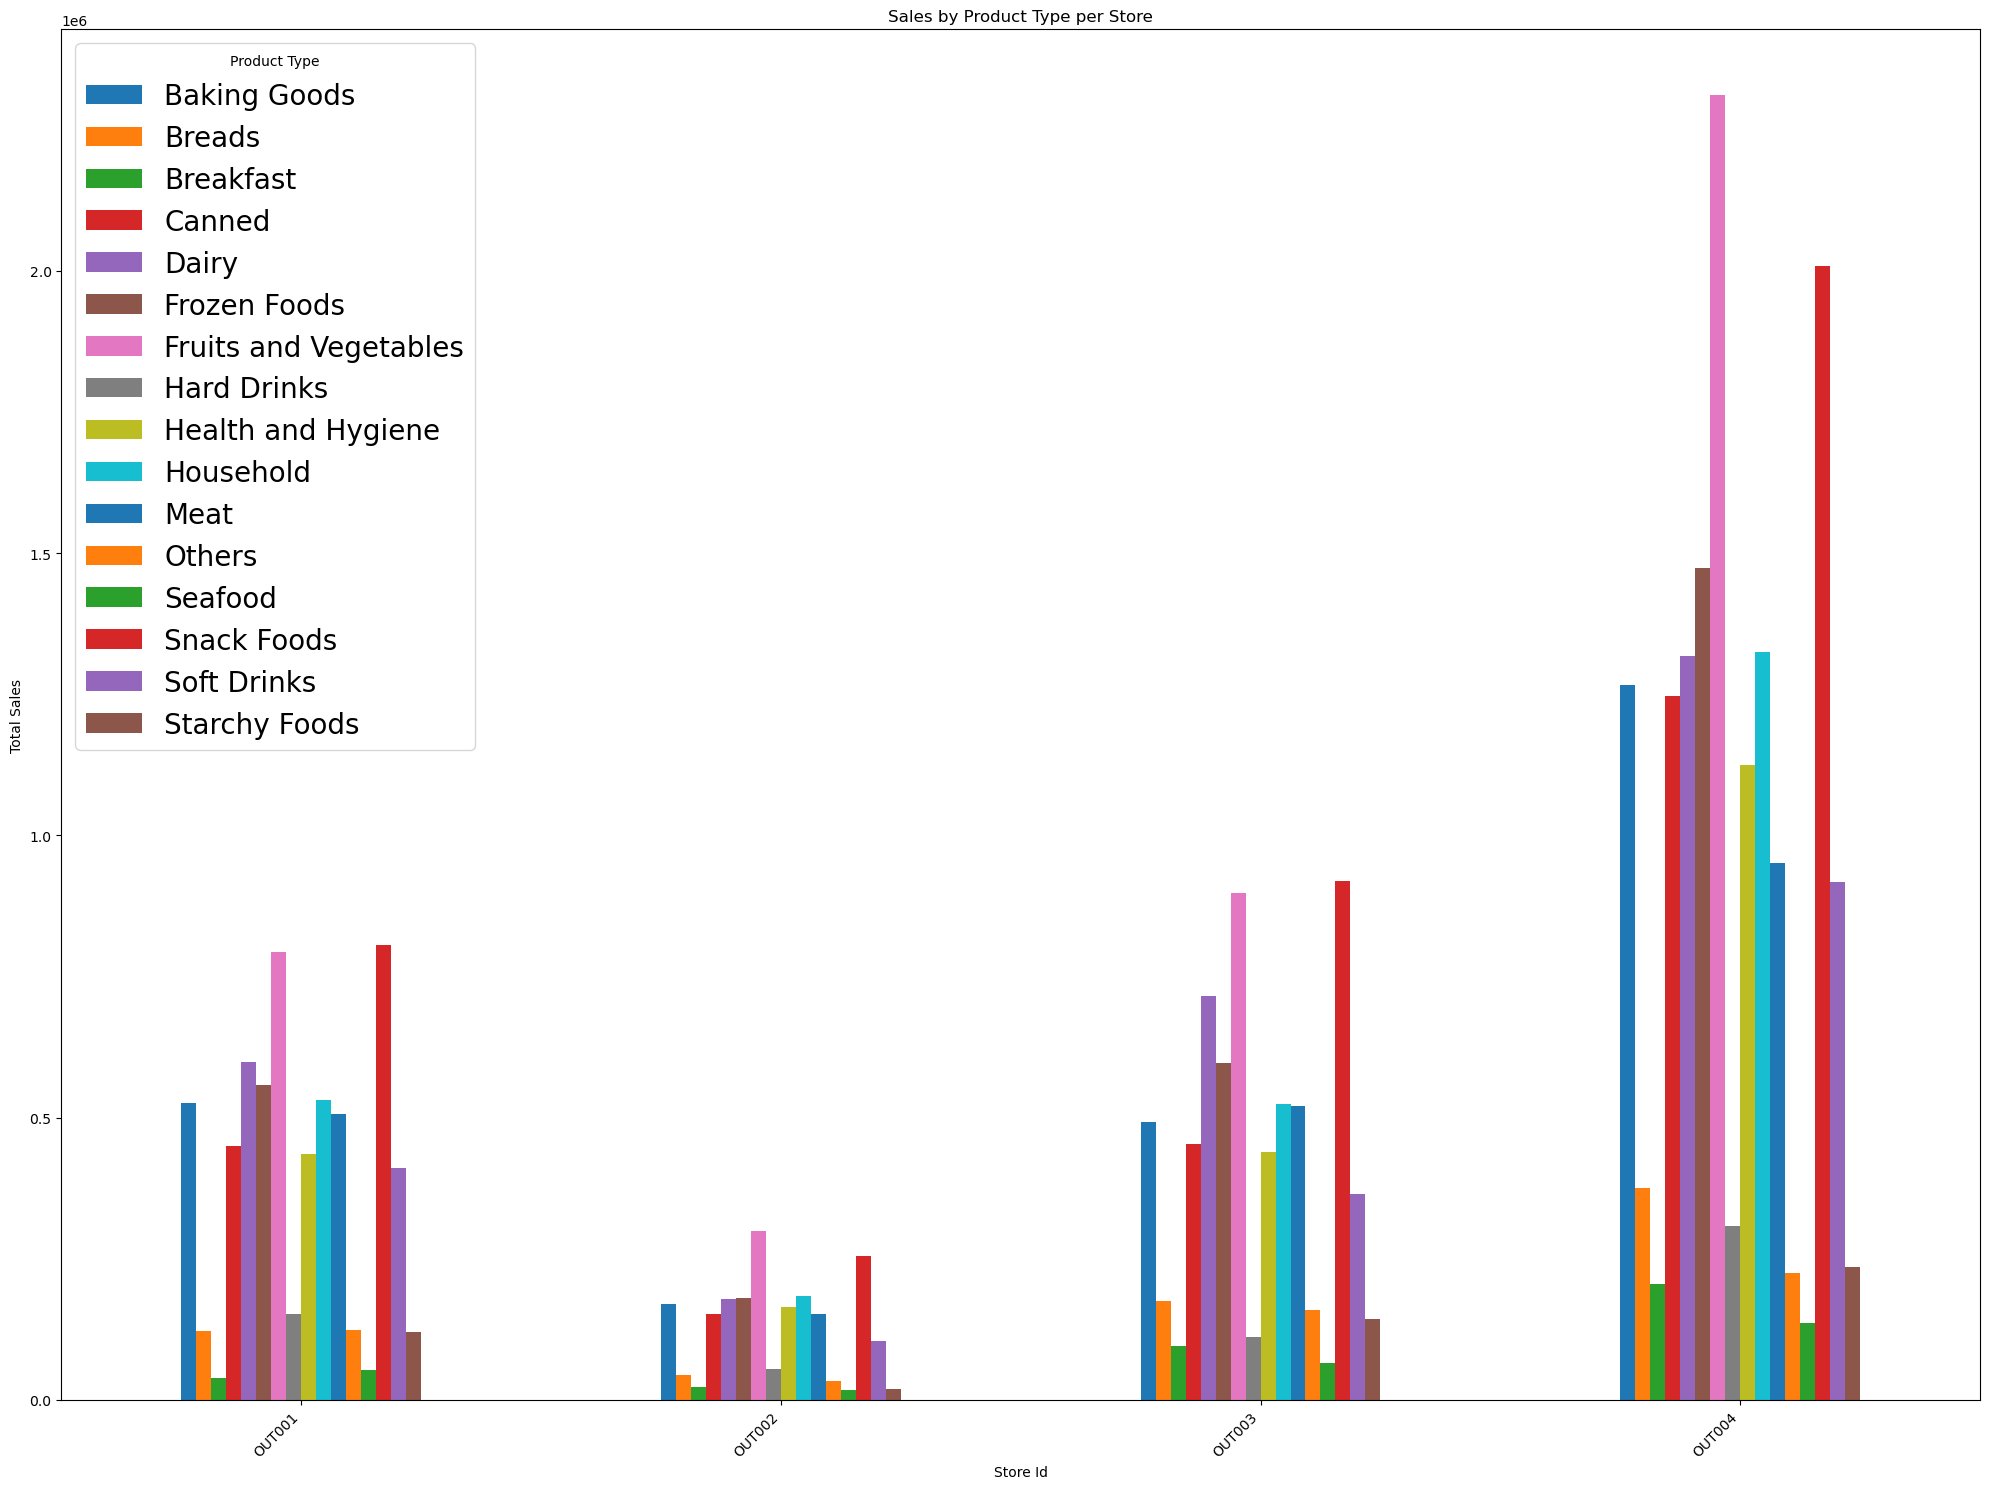

In [18]:
# Group by 'Store_Id' and 'Product_Type' to get the count of sales of each product type sold in each store
product_count_by_store = df.groupby(['Store_Id', 'Product_Type'])['Product_Store_Sales_Total'].count()

# Find the product type that has been sold the most number of times in each store
max_sold_product_by_store = product_count_by_store.groupby(level='Store_Id').idxmax()

print("Product type sold the most number of times in each store:")
print(max_sold_product_by_store)

# Group by 'Store_Id' and 'Product_Type' to get the total revenue of each product type in each store
revenue_by_product_type = df.groupby(['Store_Id', 'Product_Type'])['Product_Store_Sales_Total'].sum()

# Find the product type that is contributing the most to the revenue of each store
top_revenue_product_by_store = revenue_by_product_type.groupby(level='Store_Id').idxmax()

print("\nProduct type contributing the most to the revenue of each store:")
print(top_revenue_product_by_store)

sales_by_product_type_per_store = df.groupby(['Store_Id', 'Product_Type'])['Product_Store_Sales_Total'].sum().unstack()

# Plot the sales by product type per store using a grouped bar plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the sales by product type per store using a grouped bar plot
sales_by_product_type_per_store.plot(kind='bar', ax=ax)
ax.set_xlabel('Store Id')
ax.set_ylabel('Total Sales')
ax.set_title('Sales by Product Type per Store')
ax.set_xticklabels(sales_by_product_type_per_store.index, rotation=45, ha='right')

# Adjust legend size
legend = ax.legend(title='Product Type', prop={'size': 20})

plt.tight_layout()
plt.show()

##### The product type that is contributing the most to the revenue of the individual stores: 

Snack Foods are the product type sold most frequently at the OUT001 store. Fruits and vegetables are the product category that OUT002 store sells the most of. Snack Foods are the product category that OUT003 store sells the most of. Fruits and vegetables are the product category that OUT004 store sells the most of. Similarly, Snack Foods is the product category that generates the most of the revenue for the OUT001 store. Fruits and vegetables are the product category for the OUT002 store that contributes the most to revenue. Snack Foods are the product category for the OUT003 store that generates the largest amount of revenue. Fruits and vegetables are the product category for the OUT004 store that contributes the most to revenue.





### There are some stores of a company that generally sell only premium items having higher prices than others. Which store has sold more costly goods than others?

Store with highest average MRP: OUT003


Text(0.5, 1.0, 'Store with highest average MRP')

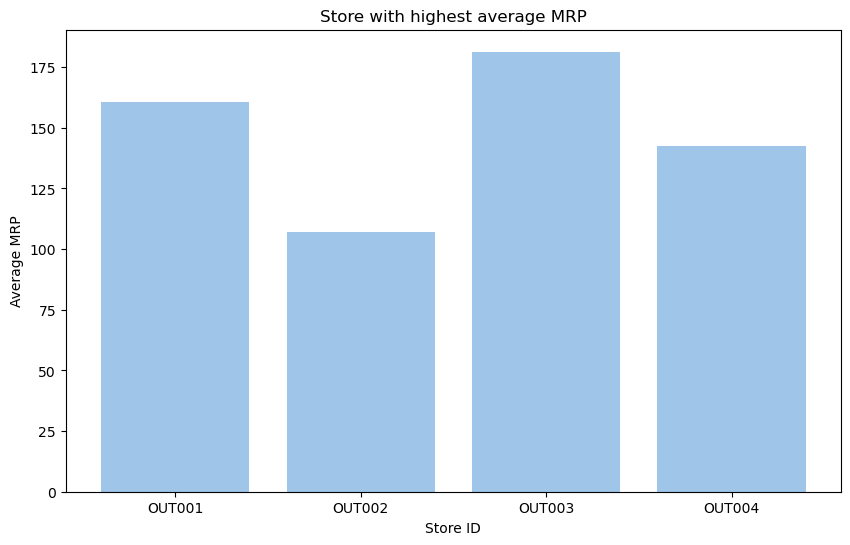

In [19]:
# Group by Store_Id and calculating the average MRP for each store
store_average_mrp = df.groupby('Store_Id')['Product_MRP'].mean()

# Finding the store with the highest average MRP
highest_avg_mrp_store = store_average_mrp.idxmax()

print("Store with highest average MRP:", highest_avg_mrp_store)

# Highlight the store with the highest average MRP
plt.figure(figsize=(10, 6))
plt.bar(store_average_mrp.index, store_average_mrp.values, color='#9fc5e8')
plt.xlabel('Store ID')
plt.ylabel('Average MRP')
plt.title('Store with highest average MRP')

##### On an average, store id OUT003 sells higher priced items then others. 

### Product type Vs. Sugar content comparison

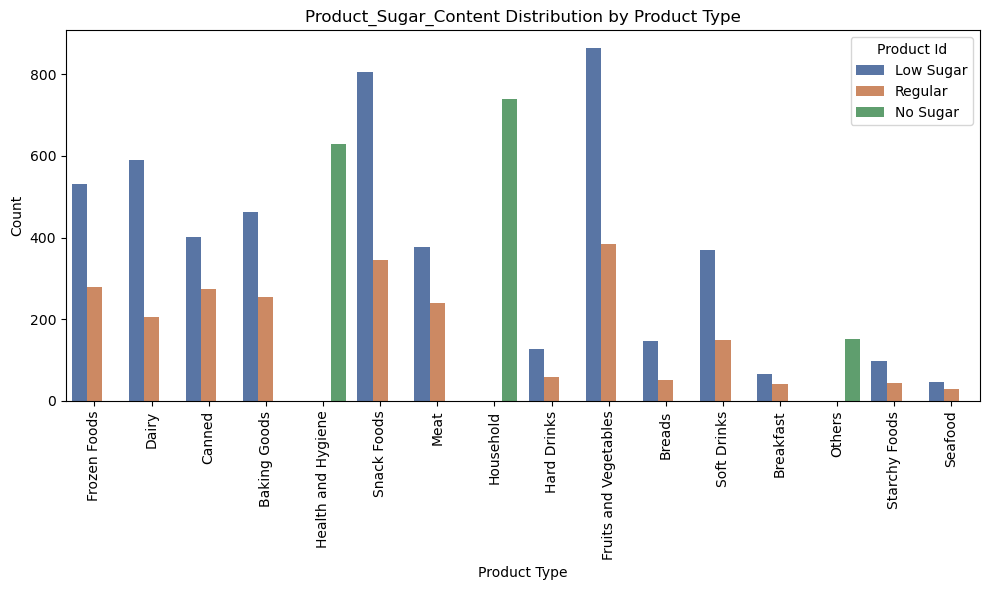

In [20]:
# Create a count plot for Product_Id against Product_Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Type', hue='Product_Sugar_Content', palette='deep')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Product_Sugar_Content Distribution by Product Type')
plt.xticks(rotation=90)
plt.legend(title='Product Id')
plt.tight_layout()

plt.show()

This plot shows the sugar content by product type. We can see that most of the product type has low sugar content.

### Comparing product type against average product weight

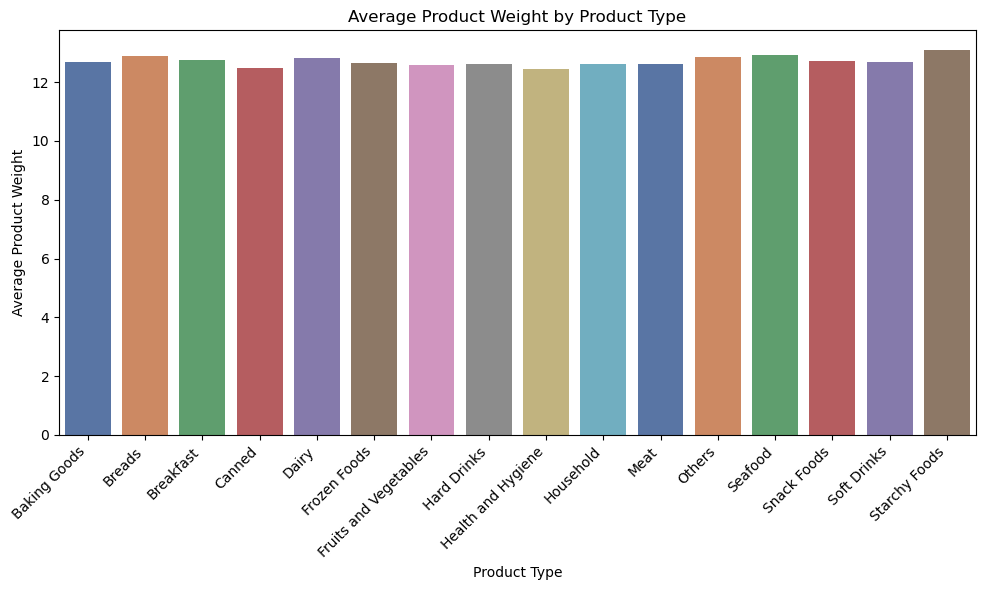

In [21]:
average_weight_by_type = df.groupby('Product_Type')['Product_Weight'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_weight_by_type, x='Product_Type', y='Product_Weight', palette='deep')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Type')
plt.ylabel('Average Product Weight')
plt.title('Average Product Weight by Product Type')
plt.tight_layout()
plt.show()

* There is not much difference across various product type for average product weight.
* Starchy foods has the highest product weight followed by sea food and breads

### Total sales as per sugar content.

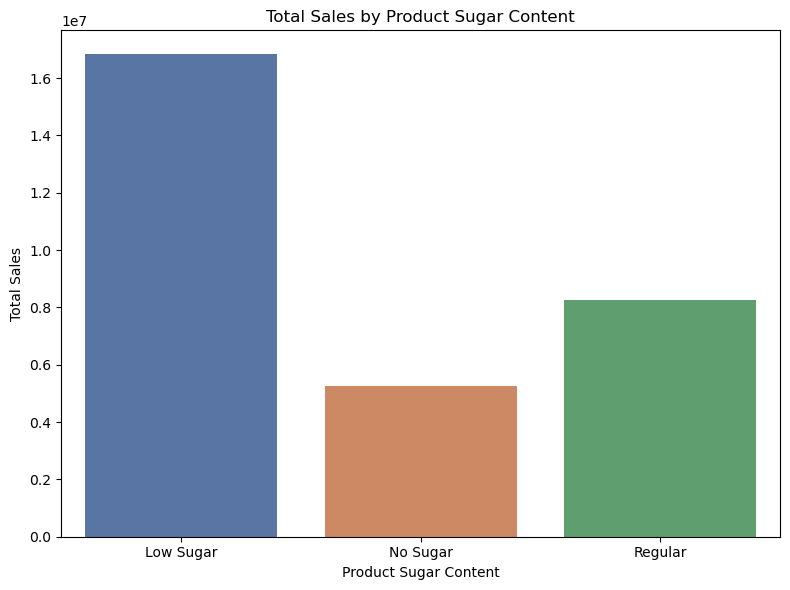

In [22]:
# Calculate total Product_Store_Sales_Total for each Product_Sugar_Content
total_sales_by_sugar_content = df.groupby('Product_Sugar_Content')['Product_Store_Sales_Total'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=total_sales_by_sugar_content, x='Product_Sugar_Content', y='Product_Store_Sales_Total', palette='deep')
plt.xlabel('Product Sugar Content')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Sugar Content')
plt.tight_layout()
plt.show()

We can see that products with low sugar content has the highest amount of sales.

## Data Preprocessing

- Missing value treatment (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [23]:
df1 = df.copy()

In [24]:
# Finding missing values
missing_data = df1.isna().sum()
print("Missing data counts:")
print(missing_data)

Missing data counts:
Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64


##### We have no missing values in any of the columns.

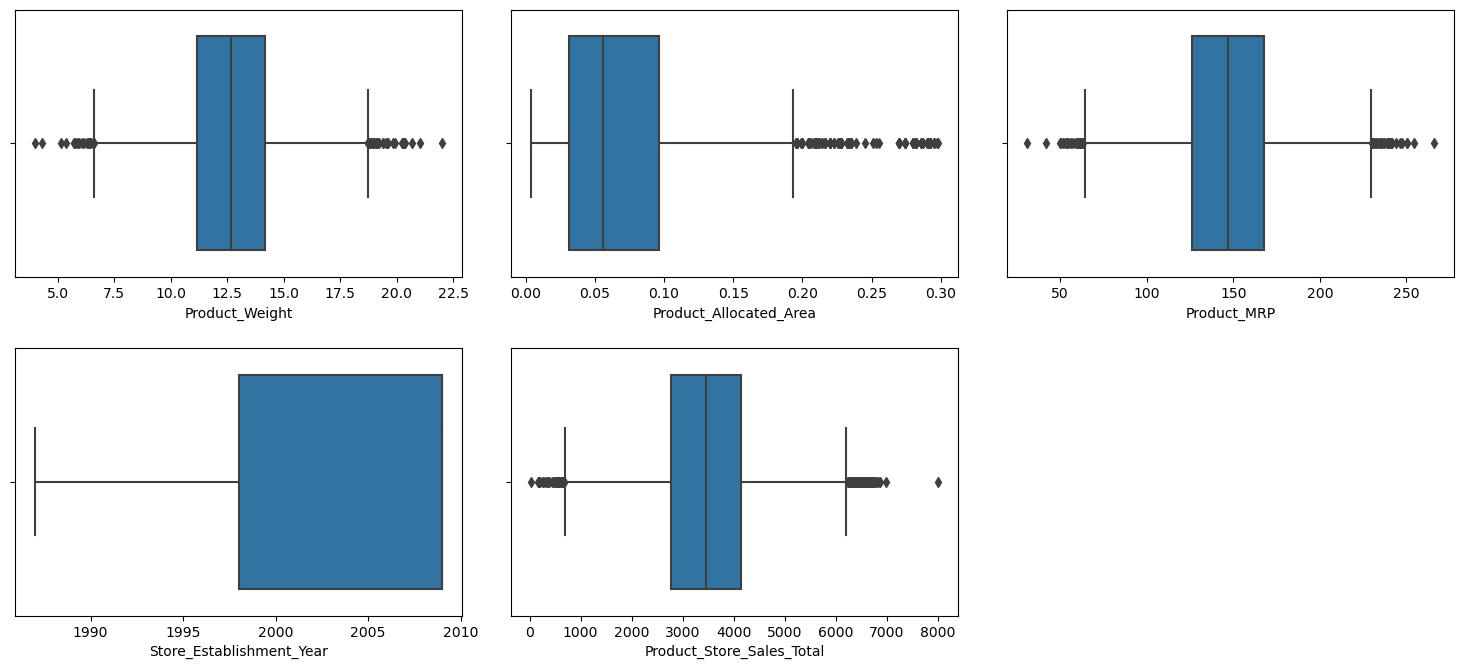

Outliers using Z-Score Method:
      Product_Weight  Product_Allocated_Area  Product_MRP  \
231            21.04                     NaN          NaN   
551            19.37                     NaN          NaN   
701            20.35                     NaN          NaN   
736             5.81                     NaN          NaN   
891            20.22                     NaN          NaN   
1945            5.72                     NaN          NaN   
2497            4.28                     NaN          NaN   
3165            5.71                     NaN          NaN   
3258           19.40                     NaN          NaN   
3967            5.13                     NaN          NaN   
4082           20.30                     NaN          NaN   
4115           19.61                     NaN          NaN   
4356           22.00                     NaN        266.0   
4423           19.82                     NaN          NaN   
4462            5.93                     NaN          

In [25]:
# Outlier check for particular columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

# Creating an empty DataFrame to store outliers based on Z-score
outliers_zscore = pd.DataFrame()

# Iterate over the numerical columns and find outliers using Z-score
for col in num_cols:
    z_scores = np.abs(stats.zscore(df1[col]))
    threshold = 3
    outliers_mask = z_scores > threshold
    outliers_zscore[col] = df1[outliers_mask][col]

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()
print("Outliers using Z-Score Method:")
print(outliers_zscore)

##### we need to exclude Store_Establishment_Year because this has to be treated as categorical variable.

In [26]:
# Checking for Constant or Near-Constant Columns
numerical_columns = ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Product_Store_Sales_Total']

# Check if any of the numerical columns have constant or near-constant values
constant_columns = df1[numerical_columns].columns[df1[numerical_columns].nunique() <= 1]
print("Constant or Near-Constant Columns:", constant_columns)

Constant or Near-Constant Columns: Index([], dtype='object')


In [27]:
columns_to_transform = ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Product_Store_Sales_Total']

for col in columns_to_transform:
    # Adding a constant value to the column to handle zero and negative values
    constant = 1e-5  # Adjust the constant
    df1[col] = df1[col] + constant

    # Apply Box-Cox transformation
    df1[col] = boxcox(df1[col])[0]

# Checking for skewness again after the transformation. Best skew value should be nearly zero
skewness_after_transformation = df1[columns_to_transform].skew()
print("Skewness after transformation:")
print(skewness_after_transformation)

Skewness after transformation:
Product_Weight              -0.000380
Product_Allocated_Area      -0.035812
Product_MRP                 -0.000496
Product_Store_Sales_Total    0.011265
dtype: float64


In [28]:
# Copying data for redundancy
df2 = df1.copy()

## Feature Engineering

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.**

In [29]:
# Calculate the current year
current_year = datetime.now().year

# Calculate the current age of the store
df2['Store_Current_Age'] = current_year - df2['Store_Establishment_Year']

# Drop the 'Store_Establishment_Year' column (optional)
df2.drop('Store_Establishment_Year', axis=1, inplace=True)

# For example, if you want to view the updated DataFrame, you can do:
df2.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Current_Age
0,FD6114,11.004675,Low Sugar,-2.498745,Frozen Foods,93.617414,OUT004,Medium,Tier 2,Supermarket Type2,1707.303625,14
1,FD7839,14.555897,Low Sugar,-1.580225,Dairy,134.593208,OUT003,Medium,Tier 1,Departmental Store,2790.777037,24
2,FD5075,12.491236,Regular,-2.434999,Canned,127.604358,OUT001,High,Tier 2,Supermarket Type1,2413.919933,36
3,FD8233,10.489375,Low Sugar,-1.740421,Baking Goods,145.671388,OUT001,High,Tier 2,Supermarket Type1,2415.014078,36
4,NC1180,8.150865,No Sugar,-2.904514,Health and Hygiene,98.635423,OUT002,Small,Tier 3,Food Mart,1391.348472,25


**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [30]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [31]:
df2['Product_Type'] = df2['Product_Type'].apply(lambda x: 'Perishables' if x in perishables else 'Non Perishables')

In [32]:
df2.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Current_Age
0,FD6114,11.004675,Low Sugar,-2.498745,Non Perishables,93.617414,OUT004,Medium,Tier 2,Supermarket Type2,1707.303625,14
1,FD7839,14.555897,Low Sugar,-1.580225,Perishables,134.593208,OUT003,Medium,Tier 1,Departmental Store,2790.777037,24
2,FD5075,12.491236,Regular,-2.434999,Non Perishables,127.604358,OUT001,High,Tier 2,Supermarket Type1,2413.919933,36
3,FD8233,10.489375,Low Sugar,-1.740421,Non Perishables,145.671388,OUT001,High,Tier 2,Supermarket Type1,2415.014078,36
4,NC1180,8.150865,No Sugar,-2.904514,Non Perishables,98.635423,OUT002,Small,Tier 3,Food Mart,1391.348472,25


## Actionable Insights and Business Recommendations

1. Product Weight Distribution: The distribution of product weights seems to be close to normal distribution, but with fatter tails. This indicates that most products have weights around the median of 12.5, but there are some products with higher weights.

2. Product Types: The majority of products sold can be categorized as:
        'Fruits and Vegetables' (14.3%)
        'Snack Foods' (13.1%)
        'Frozen Foods' (9.3%)
        'Dairy' (9.1%)
         Other types with varying percentages.
         The least common product type is 'Seafood' (0.9%).

3. Correlation Analysis: The heatmap shows that 'Product_Weight' and 'Product_MRP' are highly correlated with 'Product_Store_Sales_Total', indicating that there is a linear relationship. 'Product_Weight' also exhibits a slight correlation with 'Product_MRP'. Also all of these variables are possitively correlated.

4. Top Revenue Contributor: The product type 'Fruits and Vegetables' contributes the most to the company's revenue, with total sales of USD 4,300,833.27.

5. Store Performance: Among the different types of stores, 'Supermarket Type2' has the highest revenue, with overall sales amounting to USD 15,427,583.43. The store location type 'Tier 2' generates the highest revenue, contributing USD 21,650,696.61.

6. Product Type Sales: 'Fruits and Vegetables' are the most frequently sold items, with 864 units sold, followed by 'Snack Foods' (804 units), 'Dairy' (590 units), and 'Frozen Foods' (531 units).

7. Store Insights: The product categories that sell the most at each store are, 'Snack Foods' are popular at 'OUT001', 'Fruits and Vegetables' are dominant at 'OUT002', and 'Snack Foods' again lead at 'OUT003' and 'OUT004'.

8. Pricing Strategy: Store 'OUT003' tends to sell higher priced items compared to other stores. This insight could be leveraged for a targeted pricing.

9. Sugar Content and Sales: Products with low sugar content seem to have the highest sales. This could indicate a growing preference among consumers for healthier options and health consciousness.

10. Average Product Weight: The average product weight does not vary significantly across different product types. However, 'Starchy Foods', 'Seafood', and 'Breads' have slightly higher average weights.

**Actionable Insights and Recommendations**

1. Promote High-Revenue Products: Focus on promoting and marketing 'Fruits and Vegetables', as they are the highest revenue contributors. Highlight their health benefits and freshness to attract more customers and bring more revenue.

2. Optimize Product Mix: Consider adjusting the product mix to suit to the high demand for 'Snack Foods', 'Fruits and Vegetables', and 'Dairy' products.

3. Enhance Store Performance: Study the factors contributing to the success of 'Supermarket Type2' and explore ways to replicate that success in other store types.

4. Location-Specific Strategies: Leverage the popularity of 'Fruits and Vegetables' in 'OUT002' and 'Snack Foods' in 'OUT003' and 'OUT004' by offering additional varieties and promotions.

5. Price Analysis: Analyze the pricing of 'OUT003' store and evaluate the impact on customer preferences and revenue. Adjust pricing if necessary.

6. Healthy Product Line: Invest in expanding the product range with low sugar content, as these products are driving higher sales. Partner with suppliers to source more such products.

7. Product Packaging and Presentation: Highlight the nutritional value and quality of products with low-sugar content, targeting health-conscious consumers.

8. Customer Engagement: Engage with customers through loyalty programs, personalized offers, and feedback mechanisms to understand their preferences and further tailor product offerings.

9. Store Layout and Display: Optimize store layout to prominently display high-revenue and high-demand products to attract customer attention.

10. Market Research: Conduct market research to understand the reasons behind the popularity of certain products and stores, and use these insights to guide future business decisions.

By implementing these recommendations, the company can increase its sales, revenue, and overall customer satisfaction.

## Data Preparation for Modeling

In [33]:
df3 = df2.copy()

###### We will drop the columns Product_Id as they contain a lot of text and too many unique values, and can be excluded from modeling

In [34]:
df3.drop(["Product_Id"], axis=1, inplace=True)
df3.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Current_Age
0,11.004675,Low Sugar,-2.498745,Non Perishables,93.617414,OUT004,Medium,Tier 2,Supermarket Type2,1707.303625,14
1,14.555897,Low Sugar,-1.580225,Perishables,134.593208,OUT003,Medium,Tier 1,Departmental Store,2790.777037,24
2,12.491236,Regular,-2.434999,Non Perishables,127.604358,OUT001,High,Tier 2,Supermarket Type1,2413.919933,36
3,10.489375,Low Sugar,-1.740421,Non Perishables,145.671388,OUT001,High,Tier 2,Supermarket Type1,2415.014078,36
4,8.150865,No Sugar,-2.904514,Non Perishables,98.635423,OUT002,Small,Tier 3,Food Mart,1391.348472,25


#### One hot encoding
Before building a model, categorical characteristics must first be encoded. Next, the data must be separated into train and test sets so that the model we develop using the train set can be tested. Finally, we must build a linear regression model using the train set and evaluate its performance.

In [35]:
# Define features (X) and target (y)
X = df3.drop("Product_Store_Sales_Total", axis=1)  # Drop the target column to get features
y = df3["Product_Store_Sales_Total"]

print(X.head())
print(y.head())

   Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0       11.004675             Low Sugar               -2.498745   
1       14.555897             Low Sugar               -1.580225   
2       12.491236               Regular               -2.434999   
3       10.489375             Low Sugar               -1.740421   
4        8.150865              No Sugar               -2.904514   

      Product_Type  Product_MRP Store_Id Store_Size Store_Location_City_Type  \
0  Non Perishables    93.617414   OUT004     Medium                   Tier 2   
1      Perishables   134.593208   OUT003     Medium                   Tier 1   
2  Non Perishables   127.604358   OUT001       High                   Tier 2   
3  Non Perishables   145.671388   OUT001       High                   Tier 2   
4  Non Perishables    98.635423   OUT002      Small                   Tier 3   

           Store_Type  Store_Current_Age  
0   Supermarket Type2                 14  
1  Departmental Store         

In [36]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Current_Age,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Type_Perishables,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
0,11.004675,-2.498745,93.617414,14,0,0,0,0,0,1,1,0,1,0,0,0,1
1,14.555897,-1.580225,134.593208,24,0,0,1,0,1,0,1,0,0,0,0,0,0
2,12.491236,-2.434999,127.604358,36,0,1,0,0,0,0,0,0,1,0,0,1,0
3,10.489375,-1.740421,145.671388,36,0,0,0,0,0,0,0,0,1,0,0,1,0
4,8.150865,-2.904514,98.635423,25,1,0,0,1,0,0,0,1,0,1,1,0,0


In [37]:
# splitting the data in 70:30 ratio for train to test data

# For Model Building using Sklearn Library
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# let's add the intercept to data
X = sm.add_constant(X)

In [39]:
#For model building using OLS Library
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
print("Number of rows in train data =", x_train1.shape[0])
print("Number of rows in test data =", x_test1.shape[0])

Number of rows in train data = 6134
Number of rows in test data = 2629


## Model Building - Linear Regression

In [41]:
Lr = LinearRegression()
Lr.fit(x_train1, y_train1)

LinearRegression()

In [42]:
Lr.score(x_test1, y_test1)

0.8264636756736802

#### Lets perform same using OLS regression method.

In [43]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.825
Model:                                   OLS   Adj. R-squared:                  0.825
Method:                        Least Squares   F-statistic:                     3203.
Date:                       Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                               00:13:52   Log-Likelihood:                -42455.
No. Observations:                       6134   AIC:                         8.493e+04
Df Residuals:                           6124   BIC:                         8.500e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

#### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. 
    - Our adj. R-squared value is **0.825**, which is favorable. When considering the number of independent variables and penalizing for any unnecessary or redundant variables, an Adjusted R-squared value of 0.825 indicates that about 82.5% of the variance in the product store sales can be explained using the independent variables in the model.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - The 'const' coefficient in our situation is **-18.7701**. In this instance, a constant coefficient of -18.7701 denotes that the expected value of the product store sales total will be about -18.7701 when all independent variables are set to zero. However, as was previously said, interpreting this value may not be appropriate or practical in this particular situation due to the fact that some attributes, such as product weight and MRP, may not have a useful interpretation when set to zero.


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - The coefficients show how each independent variable is thought to affect the dependent variable (Product_Store_Sales_Total). For instance:
    
    'Product_Weight' has a coefficient of 80.8189. This means that if all other factors remain unchanged, the estimated sales total will rise by about 80.82 units for every unit increase in product weight.

    'Product_MRP' has a coefficient of 9.3786. This means that if all other factors remain unchanged, the estimated sales total will rise by about 9.38 units for every unit increase in the product's maximum retail price (MRP).



##  Model Performance Check

Let's use various indicators to assess the model's performance.

* For RMSE, MAE, and $R2$, we'll be utilizing metric functions from sklearn.

* A function to determine MAPE and adjusted $R2$ will be defined.

    - The average absolute percent error for each predicted value minus actual values divided by actual values can be used to produce the mean absolute percentage error (MAPE), which expresses prediction accuracy as a percentage. The data should not contain any extreme numbers, and no actual values should be zero.

* We'll write a function that prints out all of the aforementioned metrics at once.



In [44]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [45]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,245.268206,144.479774,0.824769,0.824253,9.034772


The RMSE is 245.268206 (Root Mean Squared Error). RMSE quantifies the average size of the residuals between the actual target values and the model's anticipated values. In this instance, it shows that the model's forecasts for the total number of product shop sales are, on average, off by about 245.27 units.

There is a 144.479774 MAE (Mean Absolute Error) in the data. Between the actual goal values and the anticipated values, it calculates the average absolute difference between the two. MAE is easier to read in the original units because, unlike RMSE, it is not affected by the square of the errors. The average absolute prediction error in this instance is roughly 144.48 units.

R2 is equal to 0.824769. It shows how much of the variation in the overall sales of a product store can be accounted for by the model's independent variables. An R-squared of 0.824769 indicates that the model's features account for about 82.5% of the variation in the overall amount of sales.

The adjusted R-squared value is 0.824253 (Adj. R2). It is a modified form of R-squared that penalizes the inclusion of irrelevant variables by accounting for the number of independent variables in the model. The fact that this number is so near to R-squared suggests that the model has the right number of pertinent variables.

9.034772 is the MAPE. The average percent difference between actual and projected values is what it represents. The average percentage mistake in this situation is roughly 9.03%.


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

When predictor variables in a regression model are correlated, multicollinearity occurs. Because the predictor factors should be independent, this association is problematic. When fitting the model and interpreting the findings, it can be challenging if there is a high correlation between the variables. The coefficients that the linear model proposes are untrustworthy when there is multicollinearity.

Multicollinearity can be found (or tested) in various methods. Utilizing the Variance Inflation Factor, or VIF, is one such approach.

Variance inflation factors quantify the increase in variances of the estimated regression parameter due to predictor collinearities. By having correlation among the predictor variables in the model, the variance of the predicted regression coefficient $beta_k$ is "inflated" to a certain extent, which is measured by this term.

If the Variance Inflation Factor (VIF) is equal to 1 for the $k$th predictor, it indicates that there is no correlation between this predictor and the other predictor variables in the model. As a result, the variance of the regression coefficient $\beta_k$ remains unaffected and is not inflated by any correlation with other predictors.

* **General Rule of thumb**:
    - Low multicollinearity is indicated by a VIF between 1 and 5.
    - VIF between 5 and 10 is regarded as exhibiting considerable multicollinearity.
    - When VIF is greater than 10, it indicates a high level of multicollinearity.

Defining a function to check VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [47]:
checking_vif(x_train)

,feature,VIF
0,const,0.000000
1,Product_Weight,1.753208
2,Product_Allocated_Area,1.001142
3,Product_MRP,1.884772
4,Store_Current_Age,inf
5,Product_Sugar_Content_No Sugar,1.210532
6,Product_Sugar_Content_Regular,1.087076
7,Product_Type_Perishables,1.122066
8,Store_Id_OUT002,inf
9,Store_Id_OUT003,inf


### Removing multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till we get all VIF scores under 5.

Let's define a function that will help us do this.

In [48]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [49]:
col_list = ["Store_Current_Age", "Store_Id"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Store_Current_Age,0.824512,245.468376
1,Store_Id,0.824512,245.468376


In [50]:
col_to_drop = "Store_Current_Age"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Store_Current_Age


,feature,VIF
0,const,0.000000
1,Product_Weight,1.753208
2,Product_Allocated_Area,1.001142
3,Product_MRP,1.884772
4,Product_Sugar_Content_No Sugar,1.210532
5,Product_Sugar_Content_Regular,1.087076
6,Product_Type_Perishables,1.122066
7,Store_Id_OUT002,inf
8,Store_Id_OUT003,inf
9,Store_Id_OUT004,inf


In [51]:
col_list = ["Store_Id", "Store_Size"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Store_Id,0.824512,245.468376
1,Store_Size,0.824512,245.468376


In [52]:
col_to_drop = "Store_Id"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Store_Id


,feature,VIF
0,const,0.000000
1,Product_Weight,1.753208
2,Product_Allocated_Area,1.001142
3,Product_MRP,1.884772
4,Product_Sugar_Content_No Sugar,1.210532
5,Product_Sugar_Content_Regular,1.087076
6,Product_Type_Perishables,1.122066
7,Store_Size_Medium,inf
8,Store_Size_Small,inf
9,Store_Location_City_Type_Tier 2,inf


In [53]:
col_list = ["Store_Size", "Store_Location_City_Type"]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Store_Size,0.824512,245.468376
1,Store_Location_City_Type,0.824512,245.468376


In [54]:
col_to_drop = "Store_Size"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Store_Size


,feature,VIF
0,const,161.162902
1,Product_Weight,1.753208
2,Product_Allocated_Area,1.001142
3,Product_MRP,1.884772
4,Product_Sugar_Content_No Sugar,1.210532
5,Product_Sugar_Content_Regular,1.087076
6,Product_Type_Perishables,1.122066
7,Store_Location_City_Type_Tier 2,inf
8,Store_Location_City_Type_Tier 3,inf
9,Store_Type_Food Mart,inf


In [55]:
col_list = ["Store_Location_City_Type", "Store_Type"]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Store_Location_City_Type,0.824512,245.468376
1,Store_Type,0.818572,249.587829


In [56]:
col_to_drop = "Store_Location_City_Type"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Store_Location_City_Type


,feature,VIF
0,const,161.162902
1,Product_Weight,1.753208
2,Product_Allocated_Area,1.001142
3,Product_MRP,1.884772
4,Product_Sugar_Content_No Sugar,1.210532
5,Product_Sugar_Content_Regular,1.087076
6,Product_Type_Perishables,1.122066
7,Store_Type_Food Mart,3.609975
8,Store_Type_Supermarket Type1,2.004361
9,Store_Type_Supermarket Type2,3.278838


In [57]:
olsmod1 = sm.OLS(y_train, x_train5).fit()
print(olsmod1.summary())

                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.825
Model:                                   OLS   Adj. R-squared:                  0.825
Method:                        Least Squares   F-statistic:                     3203.
Date:                       Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                               00:13:53   Log-Likelihood:                -42455.
No. Observations:                       6134   AIC:                         8.493e+04
Df Residuals:                           6124   BIC:                         8.500e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Observations**

- We can see that adj. R-squared has not changed at all, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

#### Dealing with high p-value variables

The goal is to address the issue of insignificant dummy variables in the data by iteratively dropping columns with high p-values. Rather than dropping all variables at once, the approach involves the following steps:

1. Build a model and analyze the p-values of each variable.
2. Identify and drop the column with the highest p-value from the model.
3. Create a new model without the dropped feature and recheck the p-values of the remaining variables.
4. Continue the process iteratively until there are no columns with p-values greater than 0.05.

This iterative approach allows us to gradually eliminate the least significant variables, refining the model with each step until all remaining variables are statistically significant (p-value <= 0.05). The process aims to create a more meaningful and efficient model by eliminating unnecessary or redundant information. The use of a loop streamlines the procedure, making it more manageable and automatable compared to a manual variable selection process.

In [58]:
# initial list of columns
predictors = x_train5.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Product_Weight', 'Product_MRP', 'Store_Type_Food Mart', 'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2']


In [59]:
x_train6 = x_train5[selected_features]
x_test6 = x_test5[selected_features]

In [60]:
olsmod2 = sm.OLS(y_train, x_train6).fit()
print(olsmod2.summary())

                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.825
Model:                                   OLS   Adj. R-squared:                  0.824
Method:                        Least Squares   F-statistic:                     5759.
Date:                       Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                               00:13:53   Log-Likelihood:                -42459.
No. Observations:                       6134   AIC:                         8.493e+04
Df Residuals:                           6128   BIC:                         8.497e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [61]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train6, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,245.429652,144.546431,0.824538,0.824367,9.037399


In [62]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test6, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,245.355631,146.886775,0.826446,0.826049,9.613197


#### Observations

The analysis indicates that the final model, `olsmod2`, contains the most relevant and statistically significant predictor variables from `x_train6`. The adjusted R-squared of 0.824 suggests that approximately 82% of the variance in the dependent variable can be explained by the model.

Comparing the adjusted R-squared values between `olsmod2` and `olsmod1`, which excluded variables with multicollinearity, we see a very slight decrease in the adjusted R-squared. This indicates that the variables dropped due to multicollinearity were not significant contributors to the model's predictive power.

Additionally, the comparable RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) values for both the train and test sets suggest that the model is not overfitting to the training data. This is a positive sign as it indicates that the model's performance is consistent on unseen data (test set).

Overall, the model seems to be performing well, explaining a significant portion of the variance in the data without overfitting. However, it's always a good practice to further evaluate the model's performance on real-world data and conduct additional validation steps to ensure its reliability and generalizability.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

In [63]:
# Let's construct a dataframe with the variables actual, fitted, and residual values.
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
910,1760.466376,1839.349943,-78.883567
7022,1956.375763,1962.192168,-5.816405
8056,1365.019796,1158.089562,206.930233
2939,1946.233701,1951.877594,-5.643894
68,2177.536298,2095.938868,81.597431


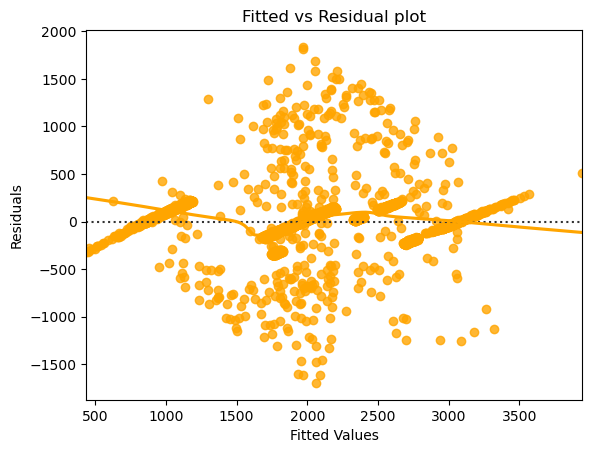

In [64]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="orange", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot represents the relationship between the residuals (errors) and the fitted values (predicted values) of the model. When examining this plot, we look for any discernible pattern. If a pattern exists, it indicates potential non-linearity in the data, suggesting that the model fails to capture non-linear effects adequately.

In the specific plot shown above, we observe no apparent pattern, which implies that the assumptions of linearity and independence are satisfied. The absence of a discernible pattern indicates that the model captures the linear relationships between the predictor variables and the target variable effectively. Consequently, we can consider the linear regression assumptions to be met, strengthening the reliability of the model's predictions.

### TEST FOR NORMALITY

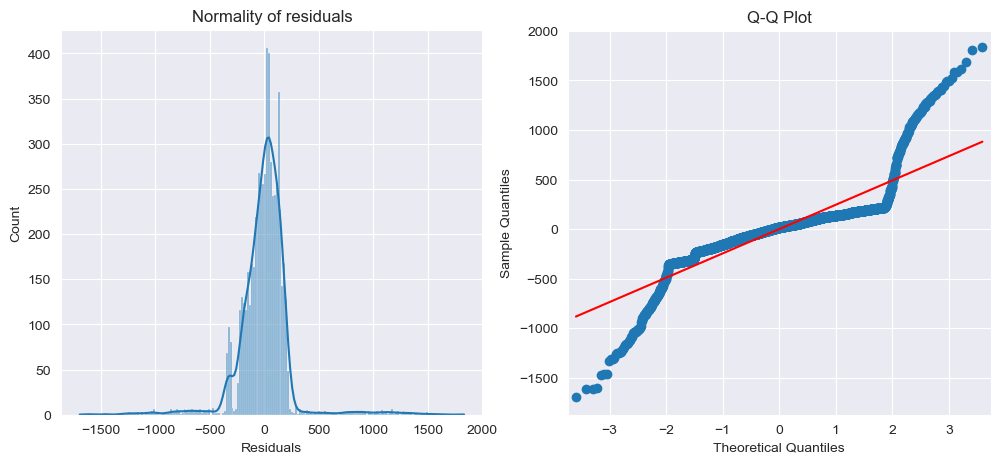

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the seaborn style to "whitegrid" for a white background with grid lines
sns.set_style("darkgrid")

# Create a subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram with KDE on the first subplot
sns.histplot(data=df_pred, x="Residuals", kde=True, bins=200, ax=axes[0])
axes[0].set_title("Normality of residuals")

# Plot Q-Q plot on the second subplot
sm.qqplot(df_pred["Residuals"], line="s", ax=axes[1])
axes[1].set_title("Q-Q Plot")

plt.show()

The histogram of residuals exhibits a normal distribution, indicating a symmetrical pattern around the central value. Moreover, when observing the Q-Q plot of the residuals, we find that most of the part align along a straight line, reflecting a close approximation to the expected normal distribution. However, it is worth noting that slight deviations from linearity can be observed in the tails of the plot.

In [66]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.7707328796386719, pvalue=0.0)

Despite obtaining a p-value < 0.05 from the Shapiro-Wilk test, indicating that the residuals do not strictly adhere to a normal distribution, we can still consider this distribution as an acceptable approximation of normality. While it is true that the residuals may not be perfectly normal, the deviation from normality is not substantial enough to invalidate the assumption. Therefore, we can reasonably conclude that the normality assumption is satisfied for practical purposes.

### TEST FOR HOMOSCEDASTICITY

In [67]:
# predictions on the test set
pred = olsmod2.predict(x_test6)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
4490,2057.861512,2025.323272
1051,2089.451371,2036.946621
2140,1796.301207,1855.252472
5471,2065.534975,2020.807619
8060,3850.391952,3558.605419
5876,1613.238292,1750.084233
4872,2144.765843,2072.523169
5834,1369.802595,1173.691845
6745,1898.441405,1922.284632
4779,2717.851652,2563.273087


The model has yielded impressive prediction results, with the actual and predicted values showing close agreement.

## Final Model

In [68]:
x_train_final = x_train6.copy()
x_test_final = x_test6.copy()

In [69]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                                OLS Regression Results                               
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.825
Model:                                   OLS   Adj. R-squared:                  0.824
Method:                        Least Squares   F-statistic:                     5759.
Date:                       Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                               00:14:02   Log-Likelihood:                -42459.
No. Observations:                       6134   AIC:                         8.493e+04
Df Residuals:                           6128   BIC:                         8.497e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,245.429652,144.546431,0.824538,0.824367,9.037399


* The model explains approximately 82% of the variation in the data, indicating a reasonably good fit.
* The similar train and test RMSE and MAE suggest that the model is not overfitting and generalizes well to unseen data.
* The MAPE on the test set, which is around 9.03%, indicates that our sales forecasts can be made with a relatively low level of error.
* Therefore, based on these evaluation metrics, we can confidently conclude that the model *olsmodel_final* is suitable for both prediction and inference purposes.

### Conclusion and Recommendation:

1. The model has an R-squared value of 0.825, which says that, it can explain approximately 82.5% of the variation in the dependent variable named 'Product_Store_Sales_Total'.

2. The adjusted R-squared value is 0.824, depicting a good fit, and it considers the number of predictors in the model.

3. The p-values for all the coefficients are less than 0.05, suggesting that all the predictor variables are statistically significant in forecasting the sales.

4. The coefficients of the model suggests that Product_Weight and Product_MRP have positive relationships with sales, while Store_Type_Food Mart, Store_Type_Supermarket Type1, and Store_Type_Supermarket Type2 have negative relationships with sales.

5. The RMSE (Root Mean Squared Error) value is 245.43, which depicts the average error between the actual sales and the model's predicted sales. A lower RMSE indicates better predictive accuracy.

6. The MAE (Mean Absolute Error) value is 144.55, which calculates the average magnitude of errors in the forecasting. A lower MAE suggests better model performance.

7. The MAPE (Mean Absolute Percentage Error) value is 9.04%, indicating that, generally on average, the model's sales forecasts are within approximately 9% of the actual sales values.

8. The Durbin-Watson statistic is approximately 1.986, indicating no significant auto-correlation in the residuals, which supports the independence assumption.

9. The Jarque-Bera (JB) test's p-value is less than 0.05, suggesting that the residuals are not normally distributed. However, the model's good predictive performance indicates that the normality assumption is not severely violated.

Overall, the final model provides a good fit and is capable of precisely forecasting sales based on the given predictor variables. However, it is essential to keep in mind that there might be other factors not considered in this model that could also influence sales. Further analysis and domain knowledge can be valuable in refining the model's performance and interpretations.









